# Stock Market Analysis Project

## Objective
Analyze and compare the stock market performance of Apple (AAPL), Microsoft (MSFT),
Netflix (NFLX), and Google (GOOG) over the past three months.

### Key Tasks:
- Data Cleaning & Preparation
- Exploratory Data Analysis (EDA)
- Trend Analysis
- Moving Averages
- Volatility Analysis
- Correlation Analysis


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")
%matplotlib inline


In [3]:
df = pd.read_csv("stocks.csv")
df.head()



,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [4]:
df.info()
df.shape


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


(248, 8)

In [5]:
df.describe()


,Open,High,Low,Close,Adj Close,Volume
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.480000e+02
mean,215.252093,217.919662,212.697452,215.381674,215.362697,3.208210e+07
std,91.691315,92.863023,90.147881,91.461989,91.454750,2.233590e+07
min,89.540001,90.129997,88.860001,89.349998,89.349998,2.657900e+06
25%,135.235004,137.440004,134.822495,136.347498,136.347498,1.714180e+07
50%,208.764999,212.614998,208.184998,209.920006,209.920006,2.734000e+07
75%,304.177505,307.565002,295.437500,303.942505,303.942505,4.771772e+07
max,372.410004,373.829987,361.739990,366.829987,366.829987,1.133164e+08


In [6]:
# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Check missing values
df.isnull().sum()


Ticker       0
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
df['Ticker'].unique()


array(['AAPL', 'MSFT', 'NFLX', 'GOOG'], dtype=object)

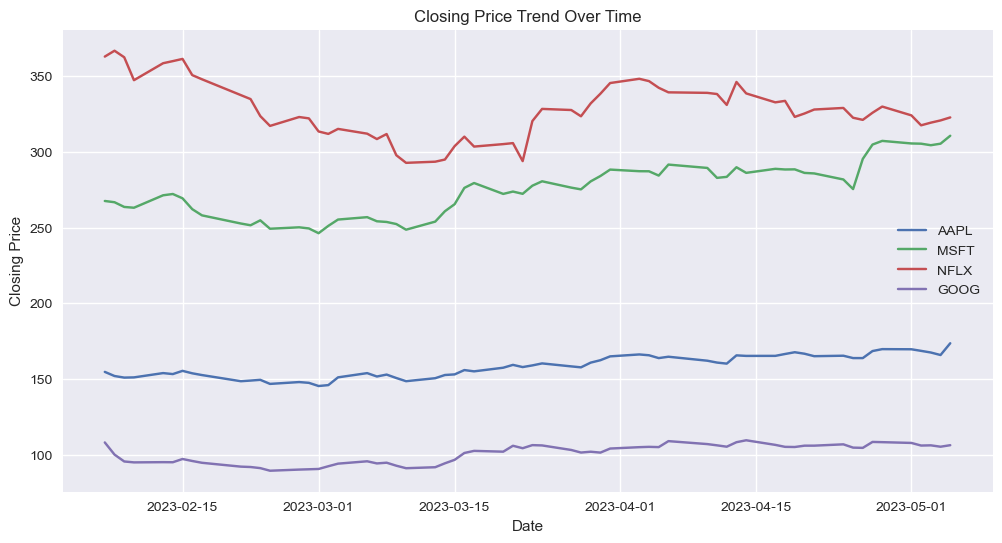

In [8]:
plt.figure(figsize=(12,6))
for ticker in df['Ticker'].unique():
    data = df[df['Ticker'] == ticker]
    plt.plot(data['Date'], data['Close'], label=ticker)

plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price Trend Over Time")
plt.legend()
plt.show()


In [9]:
df = df.sort_values(by=['Ticker', 'Date'])

df['MA_20'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(20).mean())
df['MA_50'] = df.groupby('Ticker')['Close'].transform(lambda x: x.rolling(50).mean())


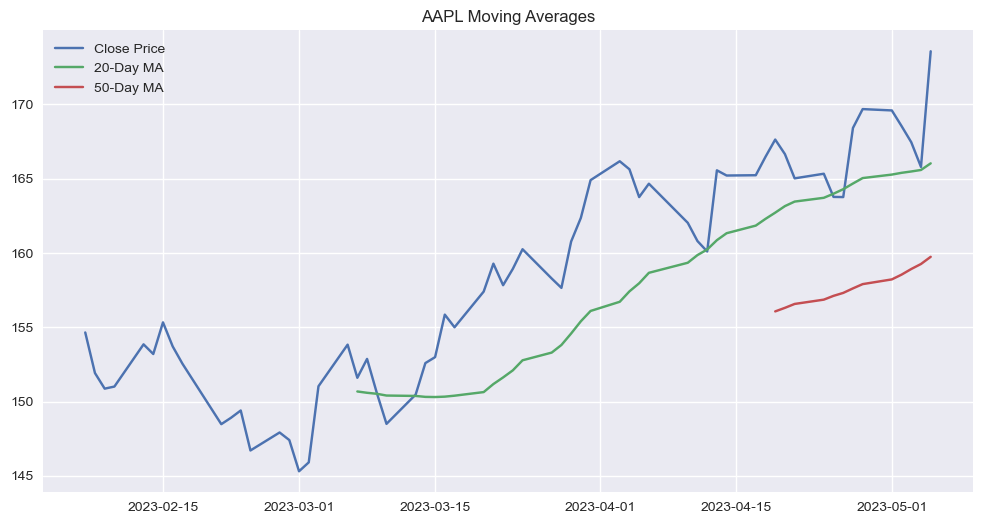

In [10]:
ticker = 'AAPL'
data = df[df['Ticker'] == ticker]

plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_20'], label='20-Day MA')
plt.plot(data['Date'], data['MA_50'], label='50-Day MA')

plt.title(f"{ticker} Moving Averages")
plt.legend()
plt.show()


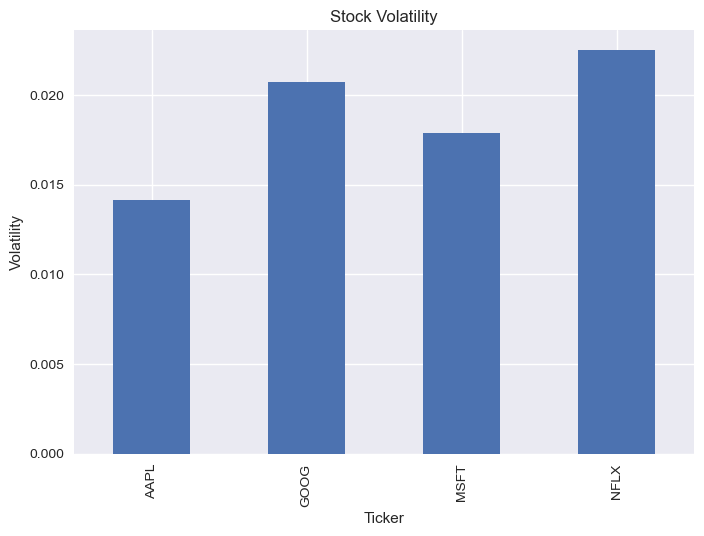

In [16]:
df['Daily_Return'] = df.groupby('Ticker')['Close'].pct_change()

volatility = df.groupby('Ticker')['Daily_Return'].std()
volatility
volatility.plot(kind='bar', title='Stock Volatility')
plt.ylabel('Volatility')
plt.show()


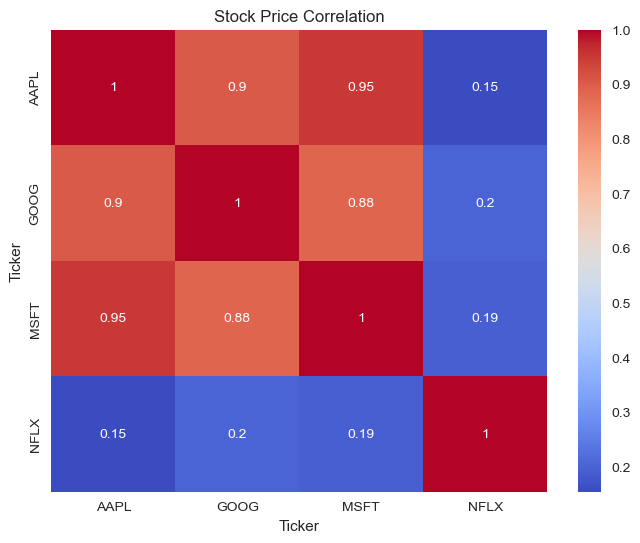

In [15]:
pivot_close = df.pivot(index='Date', columns='Ticker', values='Close')
pivot_close.corr()
plt.figure(figsize=(8,6))
sns.heatmap(pivot_close.corr(), annot=True, cmap='coolwarm')
plt.title("Stock Price Correlation")
plt.show()



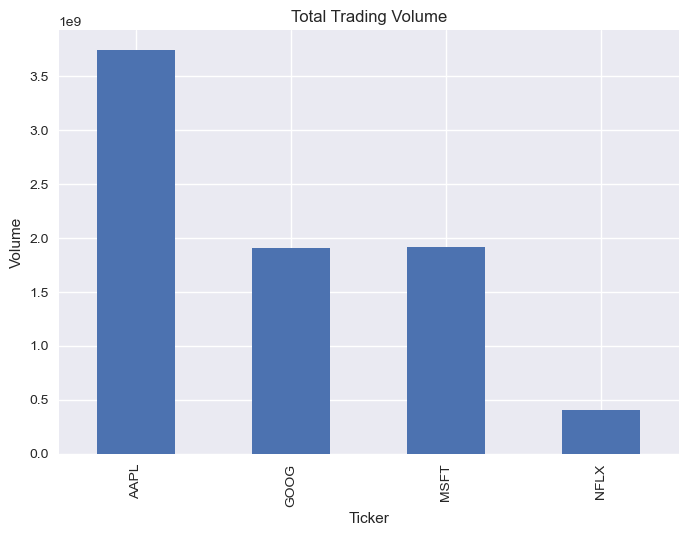

In [17]:
volume_sum = df.groupby('Ticker')['Volume'].sum()
volume_sum.plot(kind='bar', title='Total Trading Volume')
plt.ylabel("Volume")
plt.show()



## Key Insights

- Apple and Microsoft show strong upward trends.
- Netflix shows higher volatility compared to others.
- Google has stable price movement.
- Strong correlation exists between AAPL and MSFT.
- Higher volatility stocks carry higher risk.


## Conclusion

This project analyzed stock market performance using Python and data analysis techniques.
We explored trends, volatility, correlations, and trading volumes to understand
market behavior.

The analysis helps investors compare stock performance and identify risk patterns.
